**Social Deprivation Index (SDI)**<br> 
Jennifer Joseph<br> 
06/2020
<ul>
<li>Importing US county data with SDI scores</li>
<li>Restricting to NY Counties</li> 
<li>SDI variable exploration and binning into quartiles</li>
   </ul>

In [2]:
# import pandas
import pandas as pd
#import numpy 
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
# import statistics
import statistics as stat

**Importing county data with social deprivation index (SDI) from [Robert Graham Center](https://www.graham-center.org/rgc/maps-data-tools/sdi/social-deprivation-index.html)**

sdi = pd.read_csv("./raw_data/ACS2015_countyallvars.csv")

In [4]:
sdi.head(5)

,county,population,sdi_score,fpl_100_score,sing_parent_fam_score,black_score,dropout_score,no_car_score,rent_occup_score,crowding_score,...,percnt_dropout,percnt_hhnocar,percnt_rentoccup,percnt_crowding,percnt_nonemp,percnt_unemp,percnt_highneeds,percnt_hispanic,percnt_frgnborn,percnt_lingisol
0,1001,55221,22,34,10,78,55,15,18,48,...,0.128197,0.044617,0.260786,0.024368,0.075601,0.071014,0.396570,0.026077,0.015592,0.010688
1,1003,195121,15,37,8,57,35,4,25,8,...,0.104817,0.029850,0.284829,0.010769,0.076704,0.069964,0.412841,0.044977,0.035270,0.010769
2,1005,26932,88,97,80,98,98,75,55,38,...,0.266961,0.093364,0.364129,0.020061,0.181446,0.106270,0.372085,0.046079,0.027365,0.007265
3,1007,22604,31,58,10,82,83,26,14,1,...,0.193486,0.052939,0.248897,0.002277,0.083284,0.091425,0.375243,0.022208,0.011104,0.001565
4,1009,57710,36,57,21,15,90,8,6,29,...,0.214982,0.036991,0.211040,0.017246,0.079373,0.077787,0.407278,0.086294,0.041466,0.016382


In [5]:
sdi['sdi_score'].dtypes

dtype('int64')

In [6]:
sdi['sdi_score'].describe()

count    3142.000000
mean       40.687460
std        26.932835
min         1.000000
25%        17.000000
50%        39.000000
75%        60.000000
max       100.000000
Name: sdi_score, dtype: float64

**["There are 3,141 counties and county equivalents in the 50 States and the District of Columbia"](https://www.usgs.gov/faqs/how-many-counties-are-united-states?qt-news_science_products=0#qt-news_science_products)**

**Import NY County FIPS codes data**

In [7]:
county_codes = pd.read_csv("./raw_data/NY_Municipalities_and_County_FIPS_codes.csv")

In [8]:
county_codes.dtypes

County Name     object
City Name       object
Town Name       object
Village Name    object
Municipality    object
County FIPS      int64
dtype: object

**Smruthi's code: 
To avoid problems due to differences in how the county names are written, we want to use FIPS (county code) to identify counties. Since the NY site does not have the county codes, we will use a dataset that maps county names to FIPS and join the two datasets.**

In [9]:
#correcting a naming difference between the datasets
county_codes.replace("St Lawrence","St. Lawrence",inplace=True)

#st lawrence has the wrong county code so we're replacing it 
stlaw = county_codes[county_codes['County Name']=='St. Lawrence'].replace(36099, 36089)
county_codes = county_codes[county_codes['County Name']!='St. Lawrence'].append(stlaw)

**Questions: 1. Where did the information about St. Lawrence come from? 2. Where is the column name for the FIPS codes in the previous code? 3. Is append just adding this new row? What about the original St. Lawrence row - did that one get deleted with !='St. Lawrence' code?**

In [10]:
county_code_df = county_codes.groupby(['County Name','County FIPS']).size().reset_index().drop(0,axis=1)

In [11]:
county_code_df['County FIPS'].dtypes

dtype('int64')

**Restrict sdi table counties to NY counties: merge sdi table with county_code_df table (since this table only has NY FIPS codes)**

**[Pandas Merging 101](https://stackoverflow.com/questions/53645882/pandas-merging-101)**

In [12]:
#joining sdi data w NY FIPS codes to restrict to NY county SDI scores 
sdi_ny = sdi.merge(county_code_df, left_on='county', right_on='County FIPS', how='inner')

#Smruthi - can you double-check code?

In [13]:
sdi_ny.head(5)

,county,population,sdi_score,fpl_100_score,sing_parent_fam_score,black_score,dropout_score,no_car_score,rent_occup_score,crowding_score,...,percnt_rentoccup,percnt_crowding,percnt_nonemp,percnt_unemp,percnt_highneeds,percnt_hispanic,percnt_frgnborn,percnt_lingisol,County Name,County FIPS
0,36001,307463,36,37,47,64,11,90,73,5,...,0.416773,0.009324,0.064310,0.054552,0.412642,0.055249,0.088144,0.020089,Albany,36001
1,36003,48070,44,58,44,13,43,74,21,40,...,0.268635,0.020727,0.093737,0.089870,0.407135,0.015269,0.022363,0.005414,Allegany,36003
2,36005,1428357,100,99,100,91,99,100,100,100,...,0.810285,0.120878,0.141479,0.116415,0.413613,0.546264,0.344042,0.183800,Bronx,36005
3,36007,198093,52,68,59,35,32,90,47,22,...,0.342971,0.014735,0.078596,0.071290,0.416410,0.037654,0.062617,0.017161,Broome,36007
4,36009,78962,54,76,54,15,49,87,26,42,...,0.286866,0.021274,0.084671,0.079327,0.403561,0.019313,0.019946,0.008377,Cattaraugus,36009


In [14]:
sdi_ny.describe()

,county,population,sdi_score,fpl_100_score,sing_parent_fam_score,black_score,dropout_score,no_car_score,rent_occup_score,crowding_score,...,percnt_hhnocar,percnt_rentoccup,percnt_crowding,percnt_nonemp,percnt_unemp,percnt_highneeds,percnt_hispanic,percnt_frgnborn,percnt_lingisol,County FIPS
count,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,36061.984127,3.381378e+05,40.539683,44.777778,45.634921,34.873016,42.682540,71.190476,34.587302,33.396825,...,0.134454,0.324819,0.023461,0.079953,0.072466,0.400805,0.076819,0.083282,0.026297,36061.984127
std,35.791282,5.674190e+05,21.718006,23.061939,22.727205,22.289512,19.681189,21.167426,25.897213,26.602534,...,0.151625,0.133059,0.022297,0.016432,0.015269,0.016961,0.091868,0.098641,0.040005,35.791282
min,36001.000000,4.760000e+03,4.000000,2.000000,1.000000,5.000000,4.000000,15.000000,1.000000,2.000000,...,0.045584,0.144622,0.006750,0.052728,0.051933,0.354680,0.013235,0.016350,0.001584,36001.000000
25%,36032.000000,5.073950e+04,25.000000,30.000000,29.000000,15.500000,28.500000,55.000000,18.500000,13.000000,...,0.072760,0.263697,0.011956,0.069020,0.060943,0.392771,0.025172,0.024357,0.005101,36032.000000
50%,36061.000000,9.241600e+04,38.000000,44.000000,44.000000,30.000000,42.000000,75.000000,27.000000,24.000000,...,0.091761,0.289858,0.015145,0.076226,0.068994,0.401449,0.037654,0.037832,0.009453,36061.000000
75%,36092.000000,2.652430e+05,52.000000,57.000000,60.500000,51.500000,55.500000,88.500000,47.000000,46.500000,...,0.116637,0.342854,0.023267,0.090870,0.081973,0.408822,0.087416,0.092684,0.029880,36092.000000
max,36123.000000,2.595259e+06,100.000000,99.000000,100.000000,92.000000,99.000000,100.000000,100.000000,100.000000,...,0.778632,0.810285,0.120878,0.141479,0.116415,0.450280,0.546264,0.478350,0.184747,36123.000000


In [15]:
sdi_ny['sdi_score'].describe()

count     63.000000
mean      40.539683
std       21.718006
min        4.000000
25%       25.000000
50%       38.000000
75%       52.000000
max      100.000000
Name: sdi_score, dtype: float64

**Showing 63 NY counties. Double-check - should there be 63 or 62?**

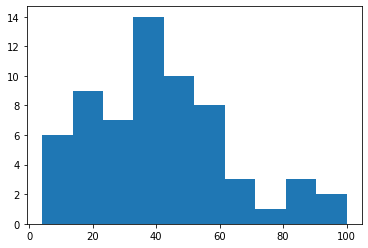

In [34]:
#SDI histogram
plt.hist(sdi_ny['sdi_score'])
plt.show()

[Binning Tutorial](https://pbpython.com/pandas-qcut-cut.html)

In [18]:
#Bin SDI into quartiles
pd.qcut(sdi_ny['sdi_score'], q=4)

0      (25.0, 38.0]
1      (38.0, 52.0]
2     (52.0, 100.0]
3      (38.0, 52.0]
4     (52.0, 100.0]
          ...      
58     (25.0, 38.0]
59    (3.999, 25.0]
60     (38.0, 52.0]
61    (3.999, 25.0]
62     (25.0, 38.0]
Name: sdi_score, Length: 63, dtype: category
Categories (4, interval[float64]): [(3.999, 25.0] < (25.0, 38.0] < (38.0, 52.0] < (52.0, 100.0]]

In [26]:
#create SDI quartile variable
sdi_ny['sdi_quartile'] = pd.qcut(sdi_ny['sdi_score'], q=4)

In [27]:
sdi_ny.head()

,county,population,sdi_score,fpl_100_score,sing_parent_fam_score,black_score,dropout_score,no_car_score,rent_occup_score,crowding_score,...,percnt_crowding,percnt_nonemp,percnt_unemp,percnt_highneeds,percnt_hispanic,percnt_frgnborn,percnt_lingisol,County Name,County FIPS,sdi_quartile
0,36001,307463,36,37,47,64,11,90,73,5,...,0.009324,0.064310,0.054552,0.412642,0.055249,0.088144,0.020089,Albany,36001,"(25.0, 38.0]"
1,36003,48070,44,58,44,13,43,74,21,40,...,0.020727,0.093737,0.089870,0.407135,0.015269,0.022363,0.005414,Allegany,36003,"(38.0, 52.0]"
2,36005,1428357,100,99,100,91,99,100,100,100,...,0.120878,0.141479,0.116415,0.413613,0.546264,0.344042,0.183800,Bronx,36005,"(52.0, 100.0]"
3,36007,198093,52,68,59,35,32,90,47,22,...,0.014735,0.078596,0.071290,0.416410,0.037654,0.062617,0.017161,Broome,36007,"(38.0, 52.0]"
4,36009,78962,54,76,54,15,49,87,26,42,...,0.021274,0.084671,0.079327,0.403561,0.019313,0.019946,0.008377,Cattaraugus,36009,"(52.0, 100.0]"


In [40]:
#label the bins
bin_labels_4 = ['Q1', 'Q2', 'Q3', 'Q4']
sdi_ny['sdi_quartile_label'] = pd.qcut(sdi_ny['sdi_score'],
                              q=[0, .25, .50, .75, 1],
                              labels=bin_labels_4)

#Q1 - Least Deprived Counties; Q4 - Most Deprived Counties

In [41]:
sdi_ny.head()

,county,population,sdi_score,fpl_100_score,sing_parent_fam_score,black_score,dropout_score,no_car_score,rent_occup_score,crowding_score,...,percnt_nonemp,percnt_unemp,percnt_highneeds,percnt_hispanic,percnt_frgnborn,percnt_lingisol,County Name,County FIPS,sdi_quartile,sdi_quartile_label
0,36001,307463,36,37,47,64,11,90,73,5,...,0.064310,0.054552,0.412642,0.055249,0.088144,0.020089,Albany,36001,"(25.0, 38.0]",Q2
1,36003,48070,44,58,44,13,43,74,21,40,...,0.093737,0.089870,0.407135,0.015269,0.022363,0.005414,Allegany,36003,"(38.0, 52.0]",Q3
2,36005,1428357,100,99,100,91,99,100,100,100,...,0.141479,0.116415,0.413613,0.546264,0.344042,0.183800,Bronx,36005,"(52.0, 100.0]",Q4
3,36007,198093,52,68,59,35,32,90,47,22,...,0.078596,0.071290,0.416410,0.037654,0.062617,0.017161,Broome,36007,"(38.0, 52.0]",Q3
4,36009,78962,54,76,54,15,49,87,26,42,...,0.084671,0.079327,0.403561,0.019313,0.019946,0.008377,Cattaraugus,36009,"(52.0, 100.0]",Q4


[Practical Statistics & Visualization](https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067)

In [43]:
#checking counts
x = sdi_ny.sdi_quartile_label.value_counts()

In [44]:
x

Q2    18
Q1    16
Q4    15
Q3    14
Name: sdi_quartile_label, dtype: int64

In [42]:
#checking percentages
x = sdi_ny.sdi_quartile_label.value_counts()
x/x.sum()

Q2    0.285714
Q1    0.253968
Q4    0.238095
Q3    0.222222
Name: sdi_quartile_label, dtype: float64

In [53]:
#making sure scores don't overlap between categories
x = pd.crosstab(sdi_ny.sdi_score, sdi_ny.sdi_quartile)
x

sdi_quartile,"(3.999, 25.0]","(25.0, 38.0]","(38.0, 52.0]","(52.0, 100.0]"
sdi_score,,,,
4,2,0,0,0
8,1,0,0,0
10,1,0,0,0
11,1,0,0,0
12,1,0,0,0
14,1,0,0,0
17,1,0,0,0
19,1,0,0,0
22,4,0,0,0


In [54]:
#another way to check that scores don't overlap between categories
x.apply(lambda z: z/z.sum()*100, axis=1)

sdi_quartile,"(3.999, 25.0]","(25.0, 38.0]","(38.0, 52.0]","(52.0, 100.0]"
sdi_score,,,,
4,100.0,0.0,0.0,0.0
8,100.0,0.0,0.0,0.0
10,100.0,0.0,0.0,0.0
11,100.0,0.0,0.0,0.0
12,100.0,0.0,0.0,0.0
14,100.0,0.0,0.0,0.0
17,100.0,0.0,0.0,0.0
19,100.0,0.0,0.0,0.0
22,100.0,0.0,0.0,0.0


In [55]:
#can also check with sdi_quartile_label

y = pd.crosstab(sdi_ny.sdi_score, sdi_ny.sdi_quartile_label)
y
y.apply(lambda z: z/z.sum()*100, axis=1)

sdi_quartile_label,Q1,Q2,Q3,Q4
sdi_score,,,,
4,100.0,0.0,0.0,0.0
8,100.0,0.0,0.0,0.0
10,100.0,0.0,0.0,0.0
11,100.0,0.0,0.0,0.0
12,100.0,0.0,0.0,0.0
14,100.0,0.0,0.0,0.0
17,100.0,0.0,0.0,0.0
19,100.0,0.0,0.0,0.0
22,100.0,0.0,0.0,0.0
